<a href="https://colab.research.google.com/github/yalex1402/AI_Course/blob/master/Search_Methods_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo 1: Solución de problemas mediante búsqueda**

**Integrantes:**
* Alejandro Gonzales Sanchez ***([Sanalegon](https://github.com/sanalegon))***
* Carlos Castro Godoy ***([CarlosCastroG](https://github.com/CarlosCastroG))***
* Yesid Garcia Lopez ***([Yalex1402](https://github.com/yalex1402))***





In [ ]:
'''
    This class represents a node, that means it's the simplest part in a tree
'''
class Node():
    def __init__(self,node_description,cost=0):
        self.value = node_description
        self.parent = None
        self.cost = cost
        self.depth = 0
        self.child = []

'''
    This class contains all methods to create, return and search into a tree.
    It has uninformed search methods and informed search methods.
'''
class Tree():

    def __init__(self,node_description,cost=0):
        self.Node = Node(node_description,cost)
    
    def addEdge(self, node_description,cost=0):
        edge = Tree(node_description,cost)
        edge.Node.parent = self.Node
        edge.Node.cost += self.Node.cost
        edge.Node.depth = self.Node.depth + 1
        self.Node.child.append(edge)

    def getEdge(self, child_index):
        return self.Node.child[child_index]
    
    def BFS(self, goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in range(number_childs):
                queue.append(node.getEdge(i))
    
    def UCS(self, goal):
        queue=[]
        queue.append(self)
        while(len(queue) != 0):
            self.order_by_cost(queue)
            node = queue.pop(0)
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión
            for i in range(number_childs):
                queue.append(node.getEdge(i))

    def DFS(self, goal):
        stack = []
        stack.append(self)
        while(len(stack) != 0):
            node = stack.pop()
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                break
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in reversed(range(number_childs)):
                stack.append(node.getEdge(i))

    def DLS(self, goal, limit_to_search):
        stack = []
        stack.append(self)
        while(len(stack) != 0):
            node = stack.pop()
            if(node.Node.depth > limit_to_search):
                continue
            if(node.Node.value == goal):
                self.get_solution(node.Node)
                return True
            number_childs = len(node.Node.childs)
            #Se debe llamar la Función Sucesión 
            for i in reversed(range(number_childs)):
                stack.append(node.getEdge(i))
        return False

    def IDS(self, goal, limit_to_search):
        while True:
            if self.DLS(goal, limit_to_search):
                break
            limit_to_search += 1 

    def order_by_cost(self, queue):
        i=0
        while i < len(queue) - 1:
            j= i + 1
            while j < len(queue):
                if queue[i].Node.cost > queue[j].Node.cost :
                    aux = queue[i]
                    queue[i] = queue[j]
                    queue[j] = aux
                j += 1
            i += 1

    def get_solution(self, node):
        if(node == None):
            return
        else:
            print("Node: " + str(node.value) + " - Cost: " + str(node.cost))
            self.get_solution(node.parent)

**Elementos a ubicar en la matriz:**
* **Player:** será representado por el *número 1*
* **Enemy:** será representado por el *número 2*
* **Obstacles:** será representado por el *número -1*
* **Empty Space:** será representado por el *número 0*

Un ejemplo claro se da en la siguiente imagen: 
 
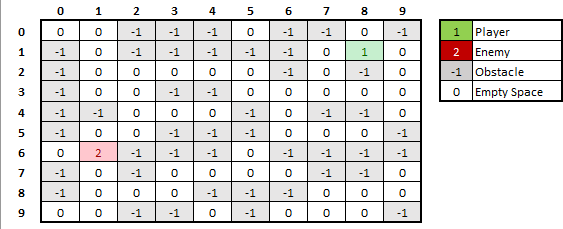

In [4]:
import numpy as np

#Generate Matrix m*n
def GenerateMatrix(nrows, ncolumns):
    matrix = []
    row=[]
    i = 0
    while i < nrows:
        j=0
        row=[]
        while j < ncolumns:
            row.append(int(input("Enter the number in position X" + str(i) + "," + str(j) + ": ")))
            j+=1
        matrix.append(row)
        i+=1
    return matrix

#If you need generate any matrix m*n use this:
#NUMBER_ROWS = int(input("Enter the number of rows: \n"))
#NUMBER_COLUMNS = int(input("Enter the number of rows: \n"))
#GenerateMatrix(NUMBER_ROWS, NUMBER_COLUMNS)

NUMBER_ROWS = 10
NUMBER_COLUMNS = 10
initialMatrix = [[0, 0, -1, -1, -1, 0, -1, -1, 0, -1], 
                 [-1, 0, -1, -1, -1, -1, -1, 0, 1, 0], 
                 [-1, 0, 0, 0, 0, 0, -1, 0, -1, 0], 
                 [-1, 0, 0, -1, -1, 0, 0, 0, 0, 0], 
                 [-1, -1, 0, 0, 0, -1, 0, -1, -1, 0], 
                 [-1, 0, 0, -1, -1, -1, 0, 0, 0, -1], 
                 [0, 2, -1, -1, -1, 0, -1, -1, -1, -1], 
                 [-1, 0, -1, 0, 0, 0, 0, -1, -1, 0], 
                 [-1, 0, 0, 0, -1, -1, -1, 0, 0, 0], 
                 [0, 0, -1, -1, 0, -1, 0, 0, 0, -1]]

print(np.matrix(initialMatrix))



[[ 0  0 -1 -1 -1  0 -1 -1  0 -1]
 [-1  0 -1 -1 -1 -1 -1  0  1  0]
 [-1  0  0  0  0  0 -1  0 -1  0]
 [-1  0  0 -1 -1  0  0  0  0  0]
 [-1 -1  0  0  0 -1  0 -1 -1  0]
 [-1  0  0 -1 -1 -1  0  0  0 -1]
 [ 0  2 -1 -1 -1  0 -1 -1 -1 -1]
 [-1  0 -1  0  0  0  0 -1 -1  0]
 [-1  0  0  0 -1 -1 -1  0  0  0]
 [ 0  0 -1 -1  0 -1  0  0  0 -1]]
